<a href="https://colab.research.google.com/github/LoPA607/tensorflow_power/blob/main/Data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [9]:
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url, cache_dir='.', untar=True)

In [10]:
data_dir


'./datasets/flower_photos'

In [11]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [12]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [13]:
roses=list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/4575042086_7674b76297_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9298314004_c1a8146521.jpg'),
 PosixPath('datasets/flower_photos/roses/15255964454_0a64eb67fa.jpg'),
 PosixPath('datasets/flower_photos/roses/16552686350_db8db55cd2.jpg'),
 PosixPath('datasets/flower_photos/roses/4735314389_94fe1b2a9f_n.jpg')]

In [14]:
flowers_images_dict={
    'roses':list(data_dir.glob('roses/*.jpg')),
    'daisy':list(data_dir.glob('daisy/*.jpg')),
    'dandelion':list(data_dir.glob('dandelion/*.jpg')),
    'sunflowers':list(data_dir.glob('sunflowers/*.jpg')),
    'tulips': list(data_dir.glob('tulips/*.jpg')),
}


In [15]:
flowers_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}

In [16]:
img=cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(268, 320, 3)

In [17]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [18]:
X,y=[],[]
for flower_names, images in flowers_images_dict.items():
  print(flower_names)
  print(len(images))

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [19]:
X,y=[],[]
for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])



In [22]:
X.shape
y.shape

(3670,)

In [21]:
X=np.array(X)
y=np.array(y)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0)

In [24]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [ ]:
num_classes=5
model=Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(5)
])
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
model.fit(X_train_scaled,y_train,epochs=10)

In [33]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 8s 278ms/step - loss: 1.6656 - accuracy: 0.6503


[1.665634274482727, 0.6503267884254456]

In [34]:
predictions=model.predict(X_test_scaled)
predictions

29/29 [==============================] - 7s 246ms/step


array([[  1.9574382 ,   5.4248905 ,  -0.4159988 ,  -8.665024  ,
         -2.3140028 ],
       [  2.6166198 ,  -4.2516084 ,  -0.6705022 ,   0.06057438,
          0.22518654],
       [ -1.3566378 ,  -0.28856134,  15.044633  , -15.779576  ,
         -7.8249807 ],
       ...,
       [ -1.2341816 ,   1.9987426 ,  -3.00192   ,   2.4847107 ,
         -2.4706411 ],
       [ 14.723914  ,   4.594238  ,  -4.2418647 , -17.391981  ,
         11.371724  ],
       [  1.7694451 , -12.838143  ,  -3.2896779 ,  11.371324  ,
          4.2338037 ]], dtype=float32)

In [35]:
score=tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([3.0154895e-02, 9.6661425e-01, 2.8092291e-03, 7.3465117e-07,
       4.2101200e-04], dtype=float32)>

In [36]:
np.argmax(score)

1

In [37]:
y_test[0]

1

In [25]:
data_augmentation=keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(180,180,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

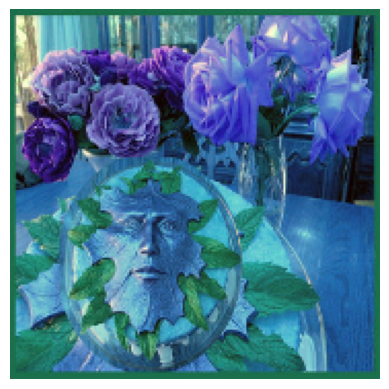

In [26]:
plt.axis('off')
plt.imshow(X[0])

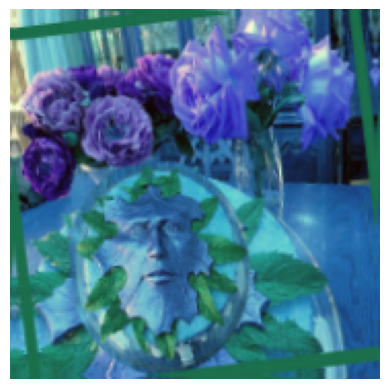

In [27]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [28]:
num_classes=5
model=Sequential([
    data_augmentation,
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(5)
])
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
86/86 [==============================] - 106s 1s/step - loss: 1.3153 - accuracy: 0.4328
Epoch 2/10
86/86 [==============================] - 104s 1s/step - loss: 1.0417 - accuracy: 0.5770
Epoch 3/10
86/86 [==============================] - 104s 1s/step - loss: 0.9597 - accuracy: 0.6221
Epoch 4/10
86/86 [==============================] - 110s 1s/step - loss: 0.9119 - accuracy: 0.6432
Epoch 5/10
86/86 [==============================] - 110s 1s/step - loss: 0.8603 - accuracy: 0.6635
Epoch 6/10
86/86 [==============================] - 116s 1s/step - loss: 0.8293 - accuracy: 0.6828
Epoch 7/10
86/86 [==============================] - 106s 1s/step - loss: 0.7727 - accuracy: 0.6951
Epoch 8/10
86/86 [==============================] - 107s 1s/step - loss: 0.7559 - accuracy: 0.7122
Epoch 9/10
86/86 [==============================] - 107s 1s/step - loss: 0.7249 - accuracy: 0.7235
Epoch 10/10
86/86 [==============================] - 100s 1s/step - loss: 0.7029 - accuracy: 0.7235


In [29]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 10s 336ms/step - loss: 0.8447 - accuracy: 0.6863


[0.8447102904319763, 0.686274528503418]